In [525]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

In [ ]:

message_path_1 = "./data/swubanden/message_1.json"
message_path_2 = "./data/swubanden/message_2.json"

def fix_encoding(file):
    with open("./data/"+file, encoding='utf-8') as f:
            content = f.read().replace("\\u00c3\\u00b8", "ø").replace("\\u00c3\\u00a6", 'æ').replace("\\u00c3\\u00a5", 'å')
    with open("./data/fixed_"+file, 'w+') as fixed:
        fixed.write(content)

#fix_encoding("message_1.json")
#fix_encoding("message_2.json")
fixed_message_path_1 = "./data/swubanden/fixed_message_1.json"
fixed_message_path_2 = "./data/swubanden/fixed_message_2.json"

f1 = open(fixed_message_path_1)
f2 = open(fixed_message_path_2)
messages_1 = json.loads(f1.read())['messages']
messages_2 = json.loads(f2.read())['messages']
df1 = pd.json_normalize(messages_1)
df2 = pd.json_normalize(messages_2)

df = pd.concat([df1, df2], ignore_index=True)
df

,sender_name,timestamp_ms,content,is_geoblocked_for_viewer,is_unsent_image_by_messenger_kid_parent,reactions,photos,videos,share.link,share.share_text,is_unsent,gifs,sticker.uri,sticker.ai_stickers,files,audio_files,call_duration
0,Max Brix Koch,1762379598429,IT universitet btw,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Max Brix Koch,1762379588385,ððð,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Daniel Millard,1762378954037,Hader også når mine secret keys udløber,False,False,"[{'reaction': 'ð¢', 'actor': 'Daniel Fich'},...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Daniel Millard,1762378925485,NaN,False,False,NaN,[{'uri': 'your_facebook_activity/messages/inbo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mads Nørklit Jensen,1762253976857,Vi rammer kantinen,False,False,"[{'reaction': 'â¤', 'actor': 'Daniel Fich'}, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14436,Albert Juel Ross,1661362380373,Du har føjet Alex Bjørnskov og Carmen Alberte ...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14437,Albert Juel Ross,1661362336276,Forældreknappen,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14438,Albert Juel Ross,1661362323515,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,your_facebook_activity/messages/stickers_used/...,[],NaN,NaN,NaN
14439,Frederik Lund Rosenlund,1661362227661,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,your_facebook_activity/messages/stickers_used/...,[],NaN,NaN,NaN


In [527]:
import emoji



df["timestamp"] = pd.to_datetime(df['timestamp_ms'], unit='ms')
df = df.sort_values("timestamp")
df['month_year'] = df['timestamp'].dt.to_period("M")
def convert_reaction_to_emoji(reactions):
    if reactions is np.nan: return []
    converted = []
    for reaction in reactions:
        as_uni = reaction["reaction"].encode("latin-1").decode("utf-8")
        converted.append({
            "reaction": emoji.demojize(as_uni),
            "actor": reaction["actor"]
        })

    return converted
df['reactions'] = df['reactions'].apply(convert_reaction_to_emoji)
df = df.drop('is_geoblocked_for_viewer', axis=1)
df = df.drop('is_unsent_image_by_messenger_kid_parent', axis=1)
like_1 = "369239343222814"
like_2 = "369239383222810"
like_3 = "369239263222822"

def is_like_sticker(url: str):
    if url is np.nan: return False
    return like_1 in url or like_2 in url or like_3 in url

df['like_sticker'] = df['sticker.uri'].apply(is_like_sticker)
#df['content'] = df['content'].apply(lambda x: x.encode("latin-1").decode("utf-8") if isinstance(x, str) else np.nan)
df

,sender_name,timestamp_ms,content,reactions,photos,videos,share.link,share.share_text,is_unsent,gifs,sticker.uri,sticker.ai_stickers,files,audio_files,call_duration,timestamp,month_year,like_sticker
14440,Albert Juel Ross,1661358024574,Det her vi laver byen aftaler jo,"[{'reaction': ':red_heart:', 'actor': 'Carmen ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-24 16:20:24.574,2022-08,False
14439,Frederik Lund Rosenlund,1661362227661,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,your_facebook_activity/messages/stickers_used/...,[],NaN,NaN,NaN,2022-08-24 17:30:27.661,2022-08,True
14438,Albert Juel Ross,1661362323515,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,your_facebook_activity/messages/stickers_used/...,[],NaN,NaN,NaN,2022-08-24 17:32:03.515,2022-08,True
14437,Albert Juel Ross,1661362336276,Forældreknappen,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-24 17:32:16.276,2022-08,False
14436,Albert Juel Ross,1661362380373,Du har føjet Alex Bjørnskov og Carmen Alberte ...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-24 17:33:00.373,2022-08,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Mads Nørklit Jensen,1762253976857,Vi rammer kantinen,"[{'reaction': ':red_heart:', 'actor': 'Daniel ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-11-04 10:59:36.857,2025-11,False
3,Daniel Millard,1762378925485,NaN,[],[{'uri': 'your_facebook_activity/messages/inbo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-11-05 21:42:05.485,2025-11,False
2,Daniel Millard,1762378954037,Hader også når mine secret keys udløber,"[{'reaction': ':crying_face:', 'actor': 'Danie...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-11-05 21:42:34.037,2025-11,False
1,Max Brix Koch,1762379588385,ððð,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-11-05 21:53:08.385,2025-11,False


In [528]:

df_removed_stickers = df[df["content"].notna()]

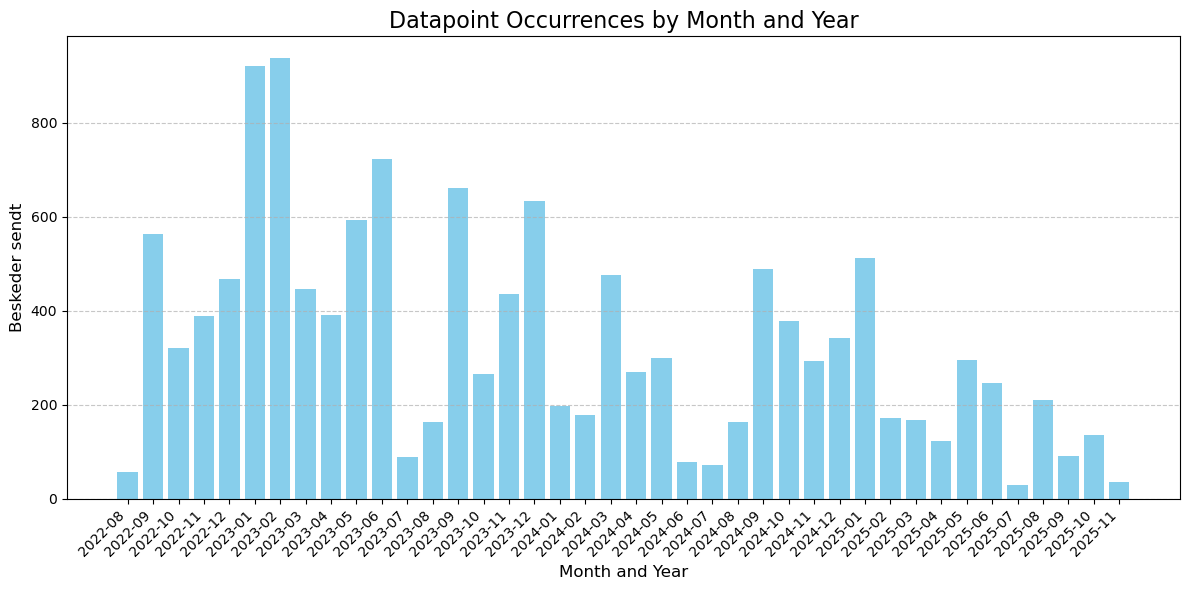

In [529]:
monthly_counts = df_removed_stickers.groupby('month_year').size().reset_index(name='datapoint_count')

# Convert the 'month_year' column back to a string/datetime for plotting labels
monthly_counts['month_year_str'] = monthly_counts['month_year'].astype(str)

# 4. Create the Bar Chart
plt.figure(figsize=(12, 6))

# Use the string column for plotting
plt.bar(
    monthly_counts['month_year_str'],
    monthly_counts['datapoint_count'],
    color='skyblue'
)

# Add labels and title
plt.title('Datapoint Occurrences by Month and Year', fontsize=16)
plt.xlabel('Month and Year', fontsize=12)
plt.ylabel('Beskeder sendt', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

/var/folders/6b/btsgzmt15cs3kr5rhn7ypmy00000gn/T/ipykernel_50629/1149841.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_removed_stickers['timestamp'] = pd.to_datetime(df_removed_stickers['timestamp_ms'], unit='ms')
/var/folders/6b/btsgzmt15cs3kr5rhn7ypmy00000gn/T/ipykernel_50629/1149841.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_removed_stickers['month_year'] = df_removed_stickers['timestamp'].dt.to_period("M")
/var/folders/6b/btsgzmt15cs3kr5rhn7ypmy00000gn/T/ipykernel_50629/1149841.py

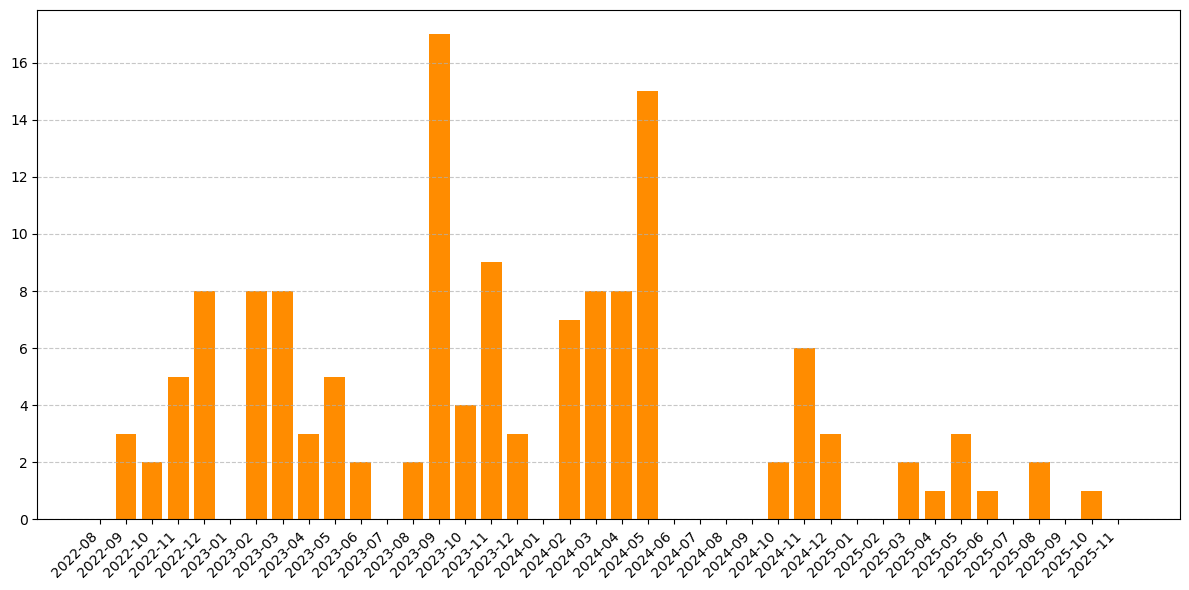

In [530]:
import pandas as pd
from collections import Counter
import re

def clean_and_tokenize(texts):
    all_words = []
    for text in texts:
        # Convert to lowercase and remove non-alphanumeric characters (except spaces)
        clean_text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
        words = clean_text.split()
        all_words.extend(words)
    return all_words

all_words = clean_and_tokenize(df_removed_stickers['content'].tolist())
word_counts = Counter(all_words)
top_words = pd.DataFrame(word_counts.most_common(20), columns=['Word', 'Count'])

# --- Part 2: Histogram (Bar Chart) of Specific Word Usage Over Time ---
SPECIFIC_WORD = 'scroll' # <--- CHANGE THIS WORD TO ANALYZE A DIFFERENT TERM

# Ensure 'timestamp_ms' is converted for time-based grouping
df_removed_stickers['timestamp'] = pd.to_datetime(df_removed_stickers['timestamp_ms'], unit='ms')
df_removed_stickers['month_year'] = df_removed_stickers['timestamp'].dt.to_period("M")

# Count the occurrences of the specific word in each message (case-insensitive, whole word match)
df_removed_stickers[f'{SPECIFIC_WORD}_count'] = df_removed_stickers['content'].apply(
    lambda x: re.findall(rf'\b{SPECIFIC_WORD}\b', x.lower())
).str.len()

# Group by month and sum the counts
monthly_word_usage = df_removed_stickers.groupby('month_year')[f'{SPECIFIC_WORD}_count'].sum().reset_index()
monthly_word_usage['month_year_str'] = monthly_word_usage['month_year'].astype(str)

# Create the bar chart for specific word usage over time
plt.figure(figsize=(12, 6))
plt.bar(
    monthly_word_usage['month_year_str'],
    monthly_word_usage[f'{SPECIFIC_WORD}_count'],
    color='darkorange'
)
#plt.title(f"Monthly Usage of the Word: '{SPECIFIC_WORD}'", fontsize=16)
#plt.xlabel('Month and Year', fontsize=12)
#plt.ylabel(f"Total Occurrences of '{SPECIFIC_WORD}'", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

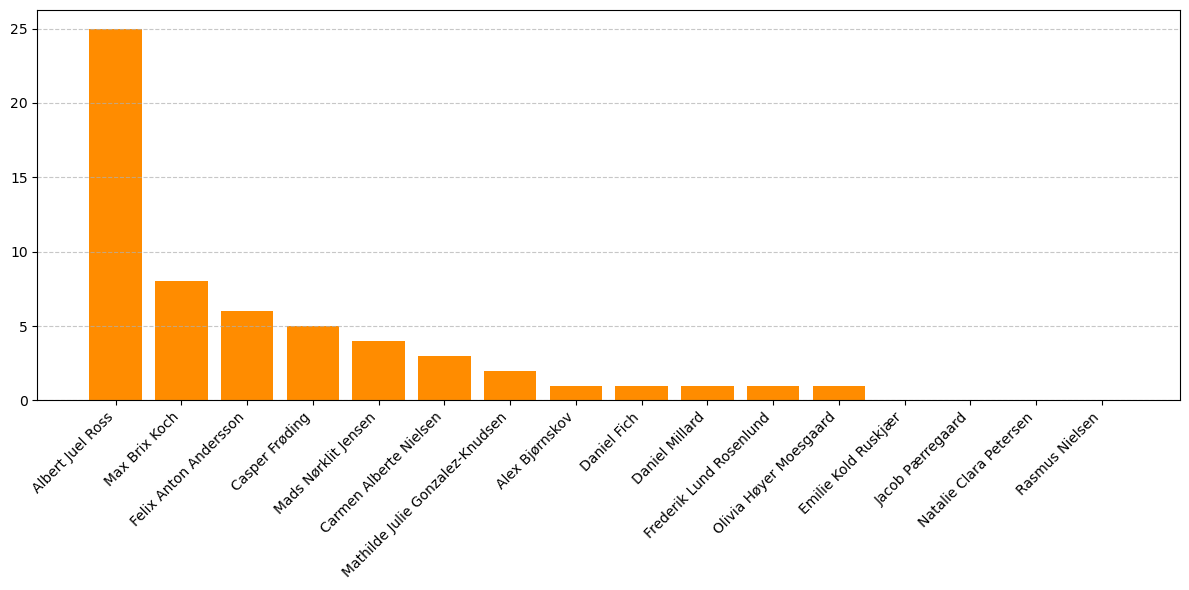

In [531]:
like_abusers = df.groupby('sender_name')['like_sticker'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(
    like_abusers.keys(),
    like_abusers.values,
    color='darkorange'
)
plt.xticks(rotation=45, ha='right')
plt.yticks()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

In [532]:
df['reaction_count'] = df['reactions'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# 2. Sort the DataFrame by the new column in descending order
#    and handle any potential NaN values in 'reactions'
df_sorted = df.sort_values(by='reaction_count', ascending=False)

# 3. Select the top 10 messages
top_20_messages = df_sorted.head(20)

# Optional: Select specific columns for a cleaner view
top_20_messages[['sender_name', 'content', 'timestamp', 'reaction_count']]


,sender_name,content,timestamp,reaction_count
6384,Felix Anton Andersson,Alle dem som kommer på lørdag reager lige på d...,2023-12-05 11:19:43.555,14
1317,Mathilde Julie Gonzalez-Knudsen,"hej friendsss, ift påskefrokost på lørdag så t...",2025-03-25 16:54:57.165,14
1154,Albert Juel Ross,NaN,2025-04-23 19:25:07.127,14
12842,Olivia Høyer Moesgaard,Wupwup re-mock er bestået!!! 21/24ð¥³ð¥³ð¥³...,2022-12-17 10:40:25.731,13
1153,Albert Juel Ross,NaN,2025-04-23 19:25:48.393,13
11793,Mathilde Julie Gonzalez-Knudsen,Hvor mange er friske på at ses i morgen aften?,2023-01-25 11:44:12.853,12
5362,Frederik Lund Rosenlund,23. Marts - påskefrokost hos mig. Like den her...,2024-03-04 14:48:05.426,11
11601,Olivia Høyer Moesgaard,Også mig,2023-01-31 14:54:32.798,11
12242,Albert Juel Ross,10 kommunikationð¤,2023-01-10 10:22:04.696,11
7623,Emilie Kold Ruskjær,NaN,2023-09-17 11:09:36.983,11


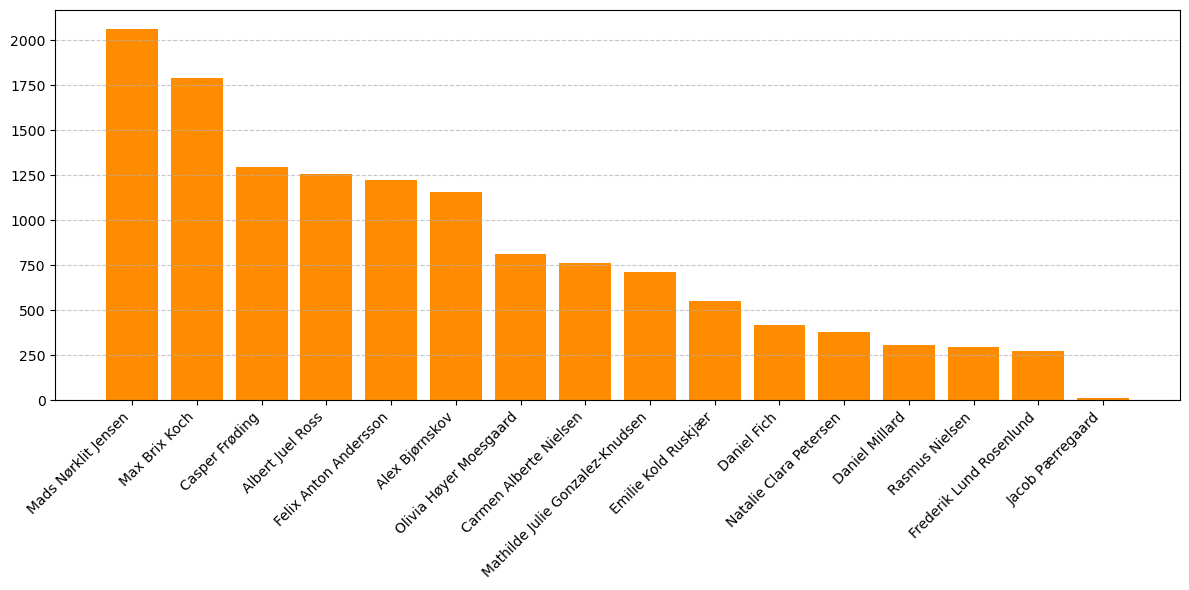

In [533]:
messages_sent = df_removed_stickers['sender_name'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(
    messages_sent.keys(),
    messages_sent.values,
    color='darkorange'
)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
#df_removed_stickers[df_removed_stickers['sender_name'] == "Jacob Pærregaard"]

In [534]:
FUNNY_REACTION_STRING = ':face_with_tears_of_joy:'
unique_reactions = dict()

# Function to count a specific reaction in the list of dictionaries
def count_specific_reaction(reactions_list, target_reaction):
    # Handle NaN or non-list values in the reactions column
    if not isinstance(reactions_list, list):
        return 0

    count = 0
    for reaction in reactions_list:
        reaction = reaction['reaction']
        if reaction not in unique_reactions:
            unique_reactions[reaction] = 1
        else:
            unique_reactions[reaction] += 1

        if reaction in target_reaction:
            count += 1
    return count

# 1. Calculate the count of 'funny' reactions for each message
df_removed_stickers['funny_reaction_count'] = df_removed_stickers['reactions'].apply(
    lambda x: count_specific_reaction(x, ':grinning_squinting_face:')
)
print(unique_reactions)

# 2. Sort the DataFrame by the new column in descending order
#    and keep only rows where the count is greater than 0
df_sorted = df_removed_stickers[df_removed_stickers['funny_reaction_count'] > 0].sort_values(
    by='funny_reaction_count', ascending=False
)


# 3. Select the top messages (e.g., top 10)
top_funny_messages = df_sorted.head(10)

# Optional: Select specific columns for a cleaner view
result = top_funny_messages[['sender_name', 'content', 'funny_reaction_count', 'timestamp']]
result['content'] = result['content'].apply(lambda x: x.encode("latin-1").decode("utf-8", errors='ignore') if isinstance(x, str) else np.nan)


result.to_csv('top_funny_messages.csv', index=False, encoding='utf-8')
df.loc[2055]['photos']
df.loc[11821]['photos']
result

{':red_heart:': 5418, ':crying_face:': 760, ':grinning_squinting_face:': 2006, ':thumbs_up:': 211, ':face_with_open_mouth:': 533, ':man_dancing:': 1, ':raising_hands:': 3, ':partying_face:': 7, ':thinking_face:': 18, ':grinning_face_with_sweat:': 9, ':smirking_face:': 3, ':face_with_raised_eyebrow:': 5, ':star-struck:': 4, ':upside-down_face:': 4, ':saluting_face:': 21, ':angry_face:': 27, ':clinking_beer_mugs:': 5, ':smiling_face_with_tear:': 6, ':face_with_monocle:': 5, ':confetti_ball:': 1, ':pleading_face:': 2, ':woman_running:': 1, ':thumbs_down:': 13, ':smiling_face_with_sunglasses:': 10, ':sleeping_face:': 2, ':smiling_face_with_heart-eyes:': 9, ':flexed_biceps:': 3, ':fire:': 9, ':rolling_on_the_floor_laughing:': 1, ':flushed_face:': 4, ':anxious_face_with_sweat:': 1, ':crossed_fingers:': 2, ':folded_hands:': 5, ':tired_face:': 3, ':winking_face:': 1, ':raised_back_of_hand:': 3, ':Denmark:': 1, ':disguised_face:': 2, ':grimacing_face:': 4, ':goggles:': 1, ':man_raising_hand:': 

/var/folders/6b/btsgzmt15cs3kr5rhn7ypmy00000gn/T/ipykernel_50629/1713996295.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_removed_stickers['funny_reaction_count'] = df_removed_stickers['reactions'].apply(
/var/folders/6b/btsgzmt15cs3kr5rhn7ypmy00000gn/T/ipykernel_50629/1713996295.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['content'] = result['content'].apply(lambda x: x.encode("latin-1").decode("utf-8", errors='ignore') if isinstance(x, str) else np.nan)


,sender_name,content,funny_reaction_count,timestamp
1042,Albert Juel Ross,Albert: Skal vi egentligt arbejde videre?\nNat...,8,2025-05-10 13:05:51.142
1262,Mathilde Julie Gonzalez-Knudsen,S nglekortet l bare i mit mobilcover.. som end...,7,2025-03-30 10:36:23.697
6550,Felix Anton Andersson,"December til alles information, fordi Albert t...",7,2023-11-29 12:01:57.815
1046,Albert Juel Ross,Albert: der er et eller andet ulkkert over ord...,7,2025-05-10 11:47:58.689
9058,Emilie Kold Ruskjær,Den er i hvert fald ikke gul,6,2023-05-30 07:30:09.783
4703,Daniel Fich,Mig til SAP:\nWhat if you had to hear me compl...,6,2024-04-15 06:28:20.987
804,Felix Anton Andersson,"""Undskyld""",6,2025-05-25 19:50:41.858
2877,Mads Nørklit Jensen,"Mads var ikke okay, Mads var plret :/",6,2024-11-02 11:09:08.154
1661,Mads Nørklit Jensen,Det ikke et tilbud man skal takke ja til tror jeg,6,2025-01-24 09:42:16.487
2577,Mads Nørklit Jensen,Ved ikke helt hvad det er for en koncert Max h...,6,2024-12-01 19:43:16.195


In [535]:
def plot_specific_word(SPECIFIC_WORD):
    df_removed_stickers['timestamp'] = pd.to_datetime(df_removed_stickers['timestamp_ms'], unit='ms')
    df_removed_stickers['month_year'] = df_removed_stickers['timestamp'].dt.to_period("M")

    df_removed_stickers[f'{SPECIFIC_WORD}_count'] = df_removed_stickers['content'].apply(
        #lambda x: re.findall(rf'\b{SPECIFIC_WORD}\b', x.lower())
        lambda x: re.findall(rf'{SPECIFIC_WORD}', x.lower())
    ).str.len()

    monthly_word_usage = df_removed_stickers.groupby('month_year')[f'{SPECIFIC_WORD}_count'].sum().reset_index()
    monthly_word_usage['month_year_str'] = monthly_word_usage['month_year'].astype(str)

    plt.figure(figsize=(12, 6))
    plt.bar(
        monthly_word_usage['month_year_str'],
        monthly_word_usage[f'{SPECIFIC_WORD}_count'],
        color='darkorange'
    )
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

In [536]:
def plot_multiple_words(df, SPECIFIC_WORDS):
    """
    Plots the monthly usage count for a list of specific words.

    Args:
        df (pd.DataFrame): The input DataFrame (df_removed_stickers in your context).
        SPECIFIC_WORDS (list): A list of strings to search for in the 'content' column.
    """
    # 1. Prepare Timestamp Columns (assuming this needs to be done once)
    # Use .copy() to avoid SettingWithCopyWarning if 'df_removed_stickers' was a slice
    df_temp = df.copy()
    df_temp['timestamp'] = pd.to_datetime(df_temp['timestamp_ms'], unit='ms')
    df_temp['month_year'] = df_temp['timestamp'].dt.to_period("M")

    # 2. Count Each Specific Word
    for word in SPECIFIC_WORDS:
        # Create a new column for each word's count
        df_temp[f'{word}_count'] = df_temp['content'].apply(
            # Using the exact search you provided (no word boundary \b)
            lambda x: len(re.findall(rf'{word}', str(x).lower()))
        )

    # 3. Group by month and sum the counts
    # Select all count columns plus 'month_year'
    count_cols = [f'{word}_count' for word in SPECIFIC_WORDS]
    monthly_usage = df_temp.groupby('month_year')[count_cols].sum().reset_index()
    monthly_usage['month_year_str'] = monthly_usage['month_year'].astype(str)
    
    # 4. Plot the results
    plt.figure(figsize=(14, 7))

    # Iterate through the words and plot a line for each
    for word in SPECIFIC_WORDS:
        plt.plot(
            monthly_usage['month_year_str'],
            monthly_usage[f'{word}_count'],
            label=word,
            marker='o' # Adds markers to see data points clearly
        )

    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Word')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    #plt.savefig('monthly_word_comparison.png')
    #plt.close() # Close the plot to free memory

    return 'monthly_word_comparison.png'



'monthly_word_comparison.png'

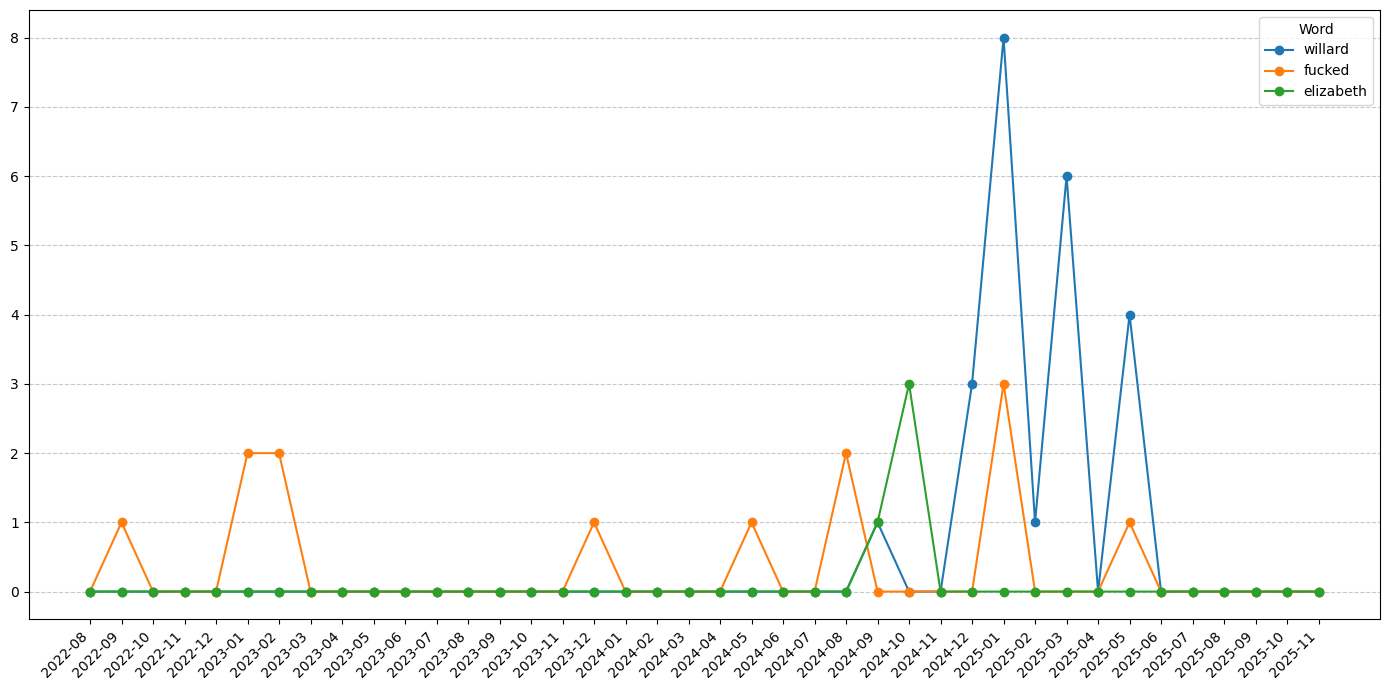

In [537]:
plot_multiple_words(df_removed_stickers, ['willard', 'fucked', 'elizabeth'])

In [538]:
# You can customize this list extensively based on your data (e.g., your name, common chat abbreviations, etc.)
DANISH_STOP_WORDS = [
    'jeg', 'du', 'han', 'hun', 'vi', 'de', 'det', 'den', 'der', 'som', 'en', 'et', 
    'af', 'til', 'for', 'på', 'i', 'og', 'med', 'er', 'har', 'kan', 'vil', 'skal', 
    'da', 'også', 'bare', 'jo', 'lige', 'tilbage', 'min', 'din', 'sin', 'vores', 
    'jer', 'mig', 'dig', 'sig', 'os', 'dem', 'ikke', 'at', 'hvad', 'hvordan', 'hvorfor', 
    'hvor', 'hvem', 'når', 'så', 'nu', 'kun', 'godt', 'lidt', 'meget', 'eller', "men", "man", "om",
    "hvis", "var","ved","her", "er",
    # General chat noise, single letters, common short words
    'ej', 'år', 'gik', 'få', 'alt', 'alle', 'denne', 'dette', 'osv', 'btw', 'incsååå',
    # Single letters that often remain after cleaning
    'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 
    'r', 's', 't', 'u', 'v', 'x', 'y', 'z' 
]

In [539]:

# 1. Define a function to clean and split the content into words (tokens)
def clean_and_tokenize(text):
    if not isinstance(text, str):
        return []
    
    # Convert to lowercase
    text = text.lower()
    
    # Use regex to remove special characters and punctuation, keeping only letters and numbers
    # Also includes Danish letters (æ, ø, å) if applicable
    text = re.sub(r'[^a-z0-9\sæøåáéóíúýàèòüäö]', ' ', text)
    
    # Remove extra spaces and split into words
    return text.split()

# 2. Apply the function, combine all word lists, and explode them into a single Series
all_words = df['content'].apply(clean_and_tokenize).explode()

# 3. Drop any empty or NaN entries
all_words = all_words.dropna()

# 4. Count the frequency of each word
word_counts = Counter(all_words)

# 5. Get the top N most common words (e.g., top 20)
most_common_words = pd.DataFrame(
    word_counts.most_common(20), 
    columns=['Word', 'Count']
)

print(most_common_words)

    Word  Count
0     er   4132
1    det   3810
2    jeg   3240
3      i   2974
4    der   2161
5     at   2074
6     på   1852
7    har   1847
8   ikke   1845
9     og   1823
10   til   1787
11    så   1650
12    en   1402
13   kan   1211
14    vi   1178
15   med   1160
16   den   1110
17   men   1013
18    du    942
19  skal    938


In [540]:
from collections import Counter


is_not_stop_word = ~all_words.isin(DANISH_STOP_WORDS)

filtered_words = all_words[is_not_stop_word]

word_counts = Counter(filtered_words)

most_common_meaningful_words = pd.DataFrame(
    word_counts.most_common(200), 
    columns=['Word', 'Count']
)

print("Top 20 most used MEANINGFUL words:")
print(most_common_meaningful_words)

Top 20 most used MEANINGFUL words:
       Word  Count
0     nogen    520
1      være    518
2     noget    498
3    kommer    450
4      tror    447
..      ...    ...
195   noter     55
196  skolen     55
197    nice     55
198     you     55
199  mening     55

[200 rows x 2 columns]


In [541]:
# Assuming 'all_words' is the Series of all cleaned, tokenized words

# A. Get individual counts for ONLY the target words

individual_counts = all_words[all_words.isin(['øl', 'scroll'])].value_counts()

# B. Get the total sum of all occurrences of these words
total_occurrences = individual_counts.sum()

print("Individual Counts for Target Words:")
print(individual_counts)
print("\nTotal Occurrences of All Target Words:")
print(total_occurrences)

Individual Counts for Target Words:
content
scroll    140
øl         54
Name: count, dtype: int64

Total Occurrences of All Target Words:
194


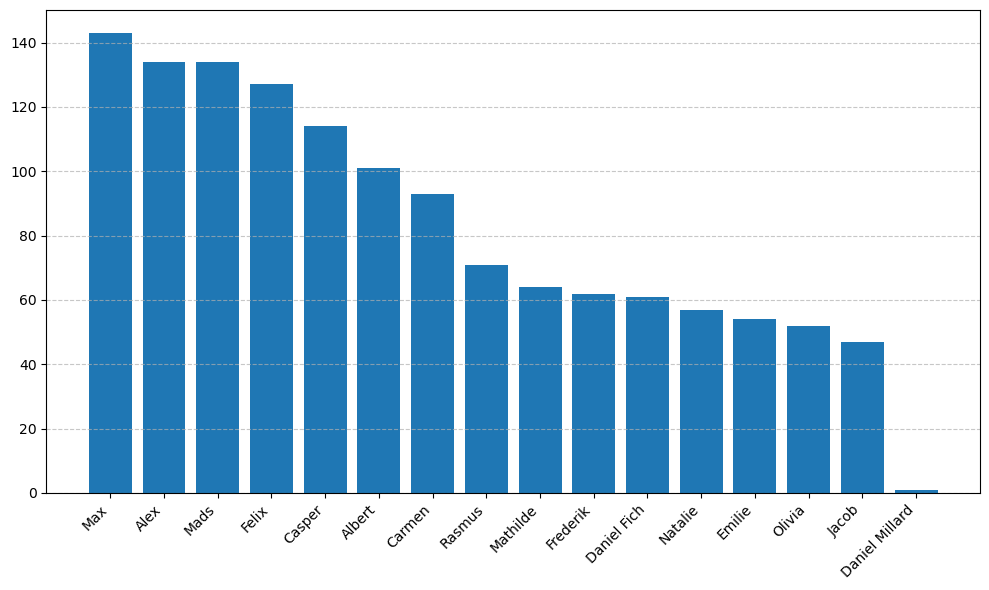

Plot saved as 'first_name_mentions_bar_chart.png'

Top 10 Mention Counts:
                Mention Count
Max                       143
Alex                      134
Mads                      134
Felix                     127
Casper                    114
Albert                    101
Carmen                     93
Rasmus                     71
Mathilde                   64
Frederik                   62
Daniel Fich                61
Natalie                    57
Emilie                     54
Olivia                     52
Jacob                      47
Daniel Millard              1


In [542]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

# --- 1. PREPARE THE DATA AND EXTRACT UNIQUE FIRST NAMES ---
# Ensure content is string, lowercased, and NaNs are handled
df['content'] = df['content'].astype(str).str.lower().fillna('')

# Extract the first word of each sender's name as the first name, and get unique list
# Assumes names are formatted "FirstName LastName"
first_names = df['sender_name'].str.split().str[0].str.lower().unique()

# Optional: Refine the list to remove very short or non-name entries
first_names = [name for name in first_names if len(name) > 1 and name not in ['du', 'jeg', 'har']]
first_names.remove('daniel')

# --- 2. COUNT MENTIONS FOR EACH FIRST NAME ---
name_mention_counts = {}

# Iterate through the unique first names
for name in first_names:
    # Use a regular expression to search for the name as a whole word (\b)
    # The sum() function aggregates the count from all messages
    count = df['content'].apply(
        lambda x: len(re.findall(rf'\b{name}\b', x))
    ).sum()
    
    # Store the result only if the name was mentioned at least once
    if count > 0:
        # Capitalize the name for plotting/display purposes
        name_mention_counts[name.title()] = count

dm_count = df['content'].apply(
    lambda x: len(re.findall(rf'daniel millard\w+', x))
).sum()
df_count = df['content'].apply(
    lambda x: len(re.findall(rf'daniel f\w+', x))
).sum()
df_count += df['content'].apply(
    lambda x: len(re.findall(rf'gul trøje', x))
).sum()

name_mention_counts["Daniel Millard"] = dm_count
name_mention_counts["Daniel Fich"] = df_count


# Convert the results to a DataFrame for sorting
mentions_df = pd.Series(name_mention_counts).to_frame(name='Mention Count')
mentions_df = mentions_df.sort_values(by='Mention Count', ascending=False)

# --- 3. PLOT THE RESULTS USING MATPLOTLIB ---

# Select the top 10 most mentioned names for a readable plot
top_n = 10
plot_df = mentions_df

plt.figure(figsize=(10, 6))

plt.bar(
    plot_df.index,
    plot_df['Mention Count'],
    color='#1f77b4' # A standard Matplotlib blue
)

plt.xticks(rotation=45, ha='right') # Rotate labels for better fit
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot to a file
plt.savefig('first_name_mentions_bar_chart.png')
plt.show() # Note: In non-interactive environments, you'll need to use plt.show() 
             # if you're not saving the figure. In notebooks, this might be optional.
print(f"Plot saved as 'first_name_mentions_bar_chart.png'")
print("\nTop 10 Mention Counts:")
print(plot_df)

<Figure size 1000x600 with 0 Axes>

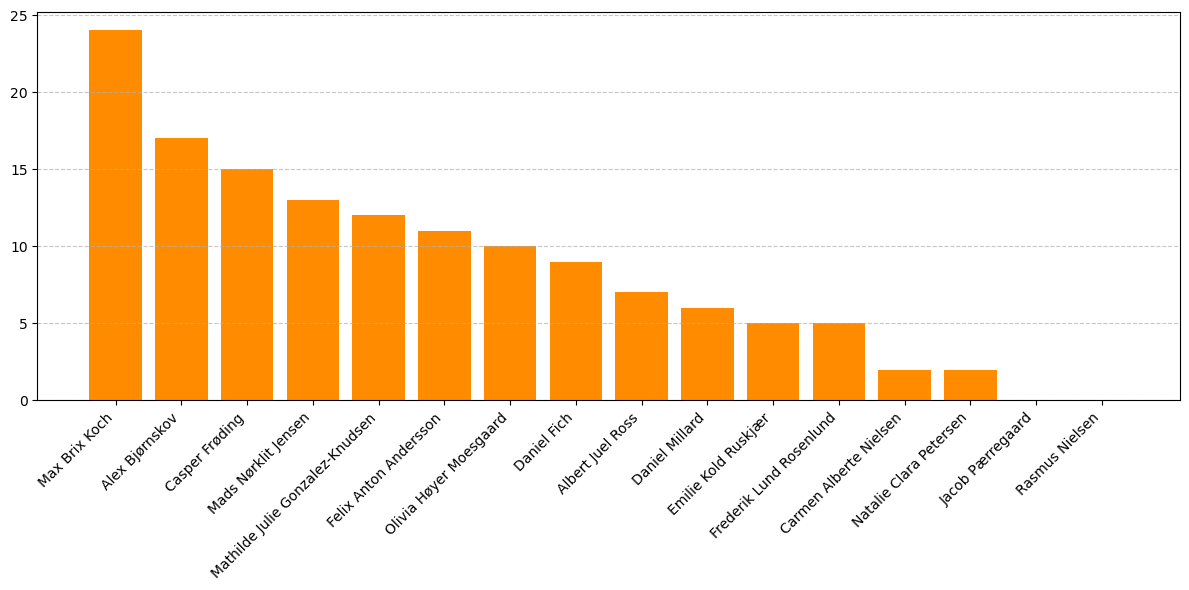

In [550]:
def normalize(data):
    messages_sent = df_removed_stickers.groupby('sender_name').size()

    return (data/messages_sent).sort_values(ascending=False)
def person_word_usage(df: pd.DataFrame, words: list[str], normalize: bool = False):
    """
    Counts the total number of times any word from the 'words' list appears 
    in the 'content' column for each sender.
    """
    
    df_temp = df.copy()
    df_temp['content'] = df_temp['content'].astype(str).str.lower().fillna('')
    
    def occurrences(series_of_content):
        total_count = 0
        pattern = r'\b(' + '|'.join(re.escape(word) for word in words) + r')\b'
        sender_text = ' '.join(series_of_content.tolist())
        total_count = len(re.findall(pattern, sender_text))
        return total_count

    messages_sent = df_temp.groupby('sender_name').size()
    total_count = df_temp.groupby('sender_name')['content'].apply(occurrences).sort_values(ascending=False)
    if not normalize:
        return total_count

    return (total_count/messages_sent).sort_values(ascending=False)

def show_histogram_data(data, yticks: bool = True):
    plt.figure(figsize=(10, 6))

    plt.figure(figsize=(12, 6))
    plt.bar(
        data.keys(),
        data.values,
        color='darkorange'
    )
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    if not yticks:
        plt.yticks([])
    plt.tight_layout()
    plt.show()


scroll_word_usage = person_word_usage(
    df_removed_stickers, 
    ['scroll'] 
)
show_histogram_data(scroll_word_usage)

<Figure size 1000x600 with 0 Axes>

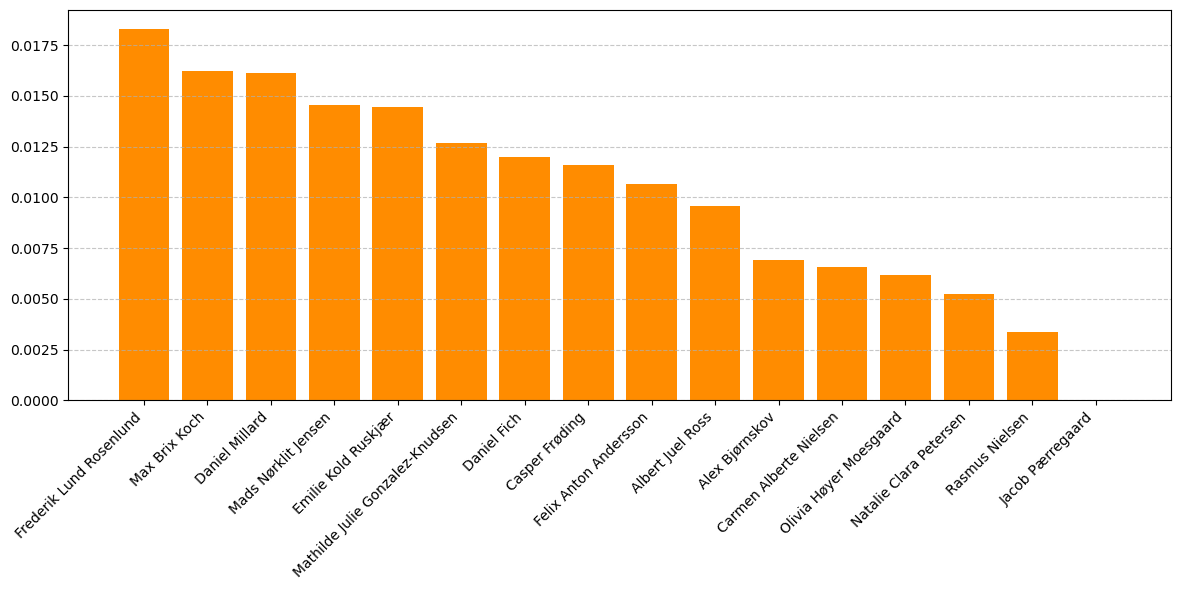

In [552]:
foul_mouthed = person_word_usage(df_removed_stickers, ['shit', 'fuck', 'lort', 'pis', 'wtf'], True)
show_histogram_data(foul_mouthed)

In [545]:

# --- 1. Data Preparation ---

# Ensure the 'timestamp' column is a proper datetime object (if not already)
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Create a time integer (HHMM format, e.g., 16:20 becomes 1620) 
# for easier comparison and handling of the ranges.
df['time_int'] = df['timestamp'].dt.hour * 100 + df['timestamp'].dt.minute

# --- 2. Define Time Slot Ranges ---

# Define conditions using the HHMM integer format.
# Note the 'Night' slot wraps around midnight (<= 700 OR >= 2201).
conditions = [
    # Night: 22:01 to 07:00
    (df['time_int'] >= 2201) | (df['time_int'] <= 700),
    
    # Before Lunch: 07:01 to 12:00
    (df['time_int'] >= 701) & (df['time_int'] <= 1200),
    
    # After Lunch: 12:01 to 18:00
    (df['time_int'] >= 1201) & (df['time_int'] <= 1800),
    
    # Evening: 18:01 to 22:00
    (df['time_int'] >= 1801) & (df['time_int'] <= 2200)
]

# Define the corresponding labels
choices = [
    'Night (22:01-07:00)',
    'Before Lunch (07:01-12:00)', 
    'After Lunch (12:01-18:00)', 
    'Evening (18:01-22:00)'
]

# --- 3. Apply Categorization and Count ---

# Apply the conditions to create the new categorical column
df['time_of_day_slot'] = np.select(conditions, choices, default='Unknown')

# Count the number of messages in each slot
message_counts_by_time = df['time_of_day_slot'].value_counts()

print("Messages Counted by Time of Day Slot:")
print(message_counts_by_time)

Messages Counted by Time of Day Slot:
time_of_day_slot
After Lunch (12:01-18:00)     6060
Before Lunch (07:01-12:00)    4042
Evening (18:01-22:00)         2807
Night (22:01-07:00)           1532
Name: count, dtype: int64


/var/folders/6b/btsgzmt15cs3kr5rhn7ypmy00000gn/T/ipykernel_50629/70525058.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp_ms'], unit='ms')
/var/folders/6b/btsgzmt15cs3kr5rhn7ypmy00000gn/T/ipykernel_50629/70525058.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_int'] = df['timestamp'].dt.hour * 100 + df['timestamp'].dt.minute
/var/folders/6b/btsgzmt15cs3kr5rhn7ypmy00000gn/T/ipykernel_50629/70525058.py:48: SettingWithCopyWarning: 
A value is tr

<Figure size 1000x600 with 0 Axes>

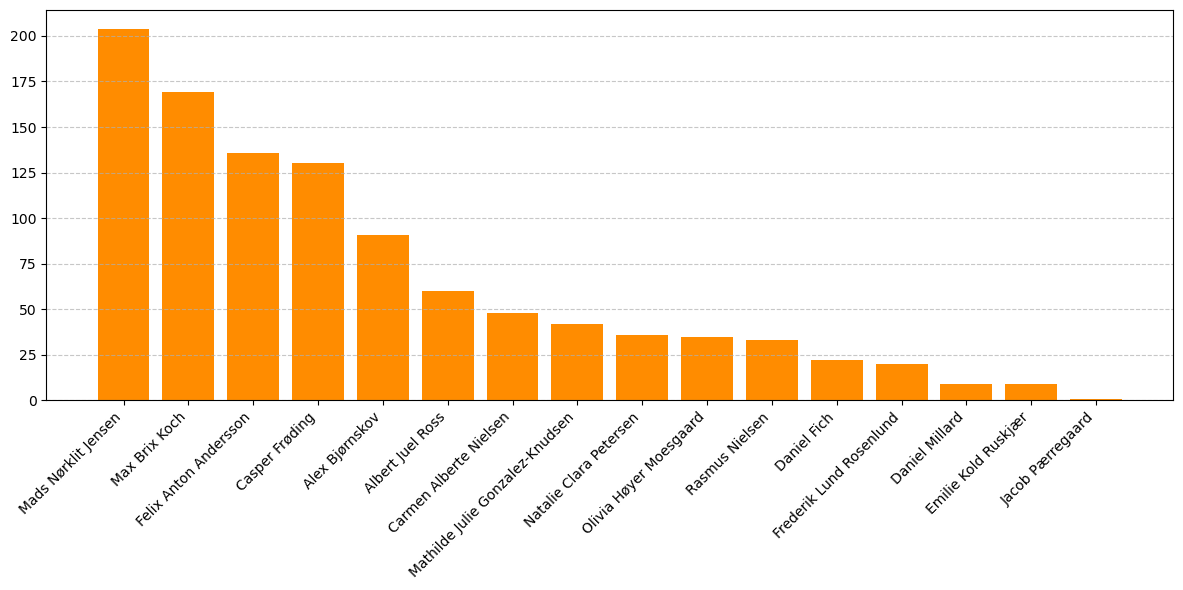

<Figure size 1000x600 with 0 Axes>

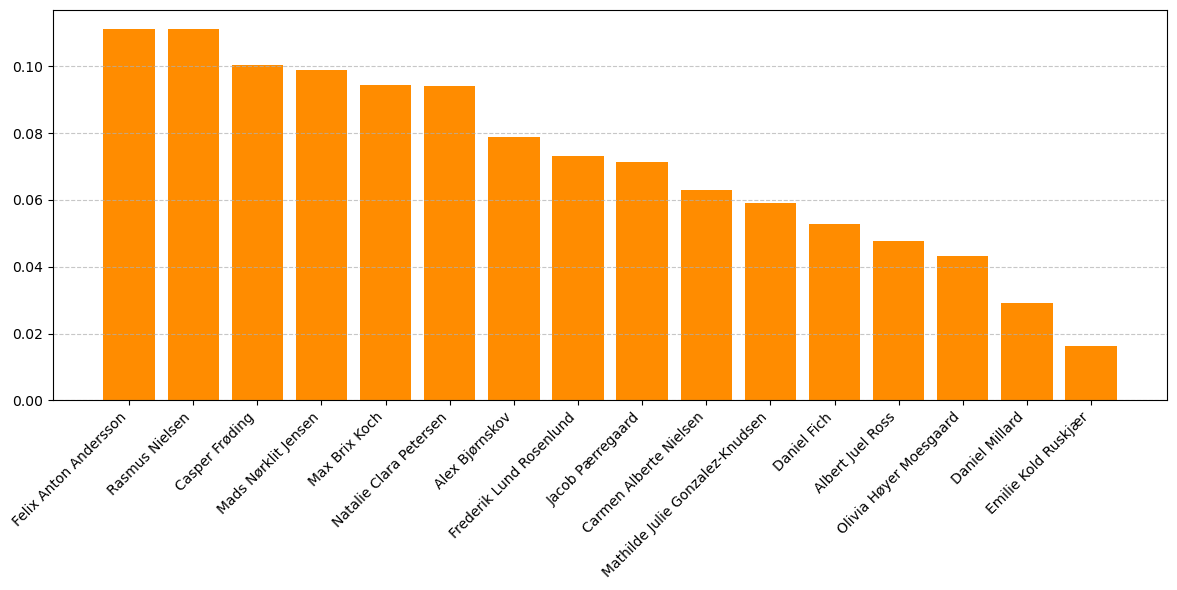

In [546]:
import pandas as pd
import numpy as np

def analyze_night_message_activity(df: pd.DataFrame) -> pd.Series:
    """
    Groups messages into four time slots and returns the number of messages 
    each person sent during the 'Night' span (22:01-07:00).

    Args:
        df: The DataFrame containing message data, including 'sender_name' and 'timestamp_ms'.

    Returns:
        A pandas Series with 'sender_name' as the index and the count of night messages.
    """
    
    # --- 1. Data Preparation and Time Slot Categorization ---
    
    # Convert 'timestamp_ms' to datetime
    df['timestamp'] = pd.to_datetime(df['timestamp_ms'], unit='ms')

    # Create a time integer (HHMM format) for comparison
    df['time_int'] = df['timestamp'].dt.hour * 100 + df['timestamp'].dt.minute

    # Define conditions and choices for the four time slots
    conditions = [
        # Night: 22:01 to 07:00 (wraps around midnight)
        (df['time_int'] >= 2201) | (df['time_int'] <= 500),
        
        # Before Lunch: 07:01 to 12:00
        (df['time_int'] >= 501) & (df['time_int'] <= 1200),
        
        # After Lunch: 12:01 to 18:00
        (df['time_int'] >= 1201) & (df['time_int'] <= 1800),
        
        # Evening: 18:01 to 22:00
        (df['time_int'] >= 1801) & (df['time_int'] <= 2200)
    ]

    NIGHT_SLOT = 'Night (22:01-07:00)'
    choices = [
        NIGHT_SLOT,
        'Before Lunch (07:01-12:00)', 
        'After Lunch (12:01-18:00)', 
        'Evening (18:01-22:00)'
    ]

    # Apply the conditions to create the categorical column
    df['time_of_day_slot'] = np.select(conditions, choices, default='Unknown')


    # --- 2. Filter and Count Messages in the Night Slot ---
    
    # Filter the DataFrame to include only messages sent during the Night slot
    night_messages = df[df['time_of_day_slot'] == NIGHT_SLOT]

    # Group the filtered messages by 'sender_name' and count the messages
    night_message_counts = (
        night_messages.groupby('sender_name')
        .size()
        .sort_values(ascending=False)
    )

    return night_message_counts

night_messages = analyze_night_message_activity(df_removed_stickers)
norm_night_messages = normalize(night_messages)
show_histogram_data(night_messages)
show_histogram_data(norm_night_messages)

<Figure size 1000x600 with 0 Axes>

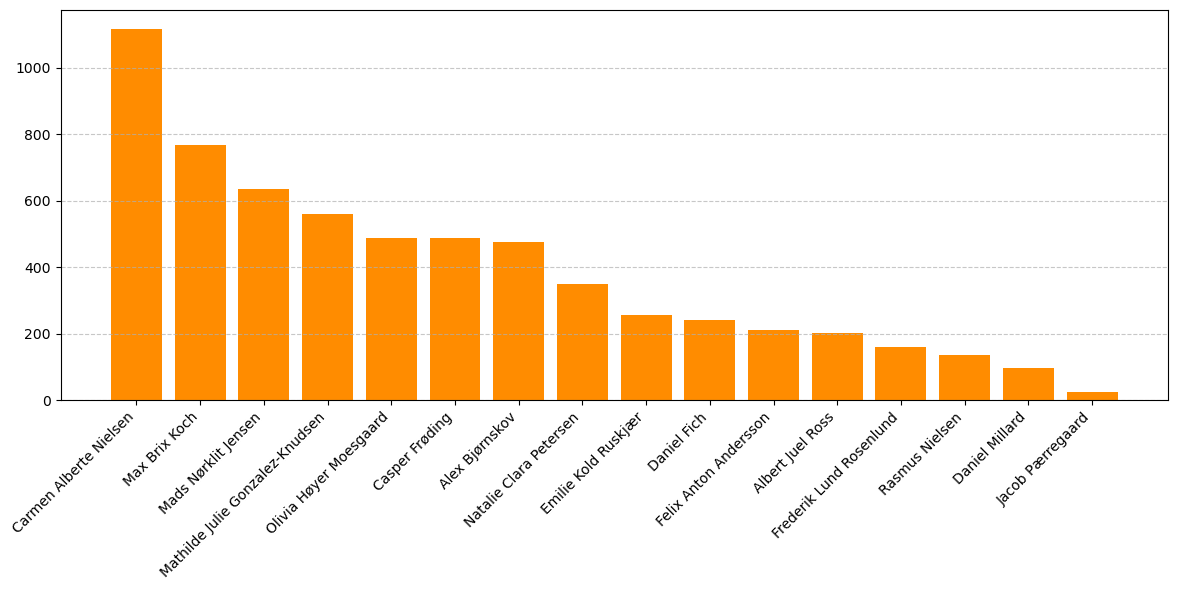

In [547]:
TARGET_REACTION = ':red_heart:'

def extract_actors(reactions_list, target_reaction):
    """Returns a list of 'actors' (senders) who gave the target reaction."""
    if not isinstance(reactions_list, list):
        return []
    
    actors = []
    for reaction in reactions_list:
        if reaction.get('reaction') == target_reaction:
            # The 'actor' is the person who GAVE the reaction
            actors.append(reaction.get('actor'))
    return actors

# Apply the function to create a new column containing a list of all red heart reactors for that message
df['red_heart_reactors'] = df['reactions'].apply(
    lambda x: extract_actors(x, TARGET_REACTION)
)
# Explode the list column into new rows, one row per reaction actor
exploded_reactors = df.explode('red_heart_reactors')

# Count the occurrences of each reactor's name
red_heart_counts = exploded_reactors['red_heart_reactors'].value_counts()

show_histogram_data(red_heart_counts)

<Figure size 1000x600 with 0 Axes>

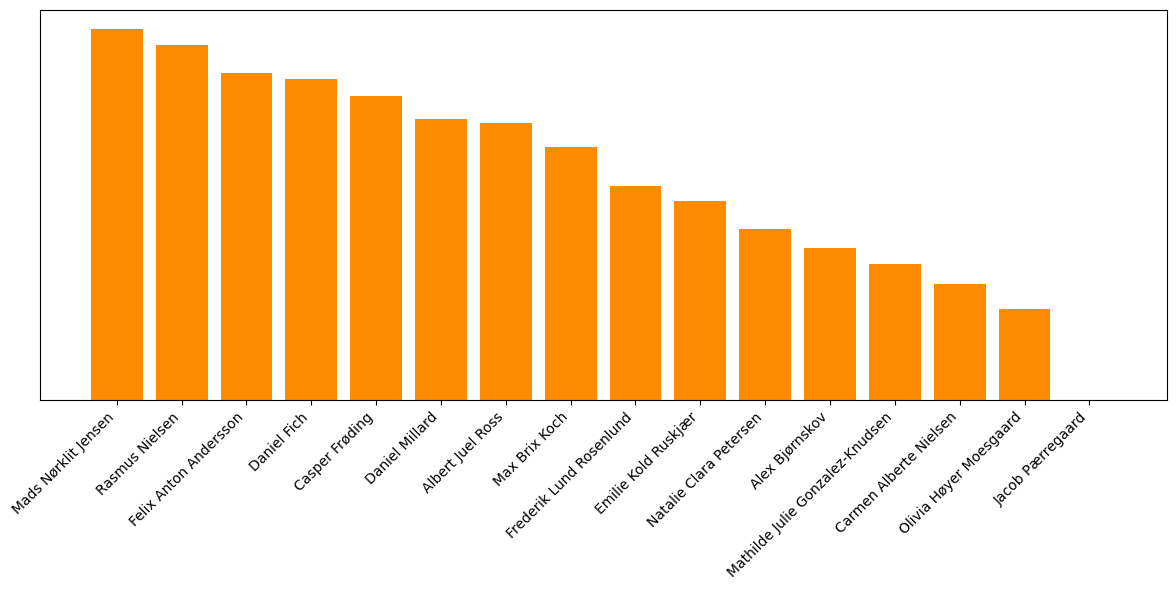

In [548]:

total_funny_reactions = df_removed_stickers.groupby('sender_name')['funny_reaction_count'].sum()
show_histogram_data(normalize(total_funny_reactions), False)

/var/folders/6b/btsgzmt15cs3kr5rhn7ypmy00000gn/T/ipykernel_50629/1345679146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_removed_stickers['love_reaction_count'] = df_removed_stickers['reactions'].apply(


<Figure size 1000x600 with 0 Axes>

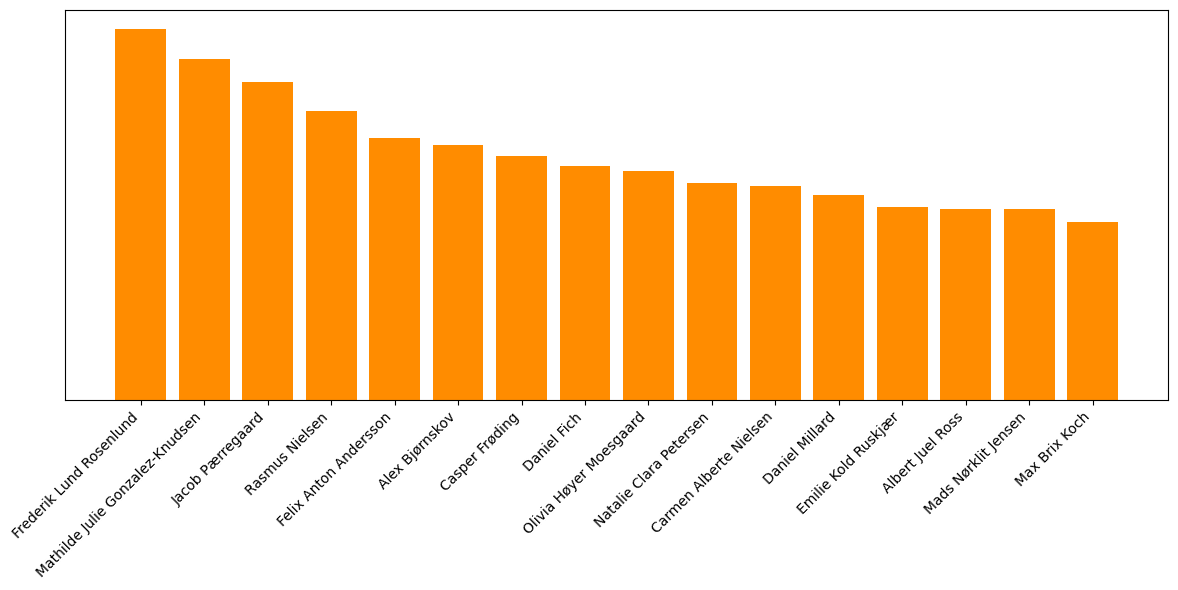

In [549]:
df_removed_stickers['love_reaction_count'] = df_removed_stickers['reactions'].apply(
    lambda x: count_specific_reaction(x, ':red_heart:')
)
total_love_reactions = df_removed_stickers.groupby('sender_name')['love_reaction_count'].sum()
show_histogram_data(normalize(total_love_reactions), False)